# 7. Model Testing Playground

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [68]:
np.random.seed(42)

In [69]:
X = pd.read_csv('../data/train_weather_merged_dum.csv')
test = pd.read_csv('../data/test_weather_merged_dum.csv')
y = pd.read_csv('../data/target.csv')

In [70]:
y = y.append({'0': 0}, ignore_index=True)

In [71]:
X.set_index('date', inplace=True)

In [72]:
test.set_index('date', inplace=True)

In [73]:
X.shape, test.shape, y.shape

((10413, 179), (116293, 179), (10413, 1))

In [74]:
with open('../models/gb.pkl', 'rb') as gs_gb:
    gs_gb = pickle.load(gs_gb)

In [75]:
with open('../models/scaler.pkl', 'rb') as ss:
    ss = pickle.load(ss)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y)

In [77]:
test_sc = ss.transform(test)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [78]:
proba_pairs = gs_gb.best_estimator_.predict_proba(X_test_sc)
gb_probas = [item[1] for item in proba_pairs]
roc_auc_score(y_test, gb_probas)

0.8107846421477014

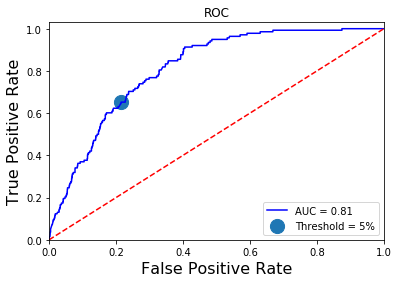

In [90]:
fpr, tpr, threshold = roc_curve(y_test, gb_probas)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.scatter(fpr[209], tpr[209], s=200, label='Threshold = 5%')
plt.legend(loc = 'lower right', fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.03])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title("ROC")
plt.legend(loc = 'lower right')
plt.show()

In [89]:
# fpr[511], 
# tpr[400], 
threshold[209]

0.05198394841648136

In [29]:
fpr[511], tpr[511], threshold[511]

(0.9306569343065694, 1.0, 0.05956753690358519)

In [14]:
index = np.arange(1, len(test) + 1)

index

predictions = gs_gb.best_estimator_.predict_proba(test_sc)[:,1]
kaggle = pd.DataFrame(data=predictions, index=index, columns=['WnvPresent'])
kaggle.index.name = 'Id'
kaggle.reset_index(inplace=True)

kaggle.shape

kaggle.to_csv('../data/gs_model2_proba.csv', index=False)